In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('Newyorksinnulos.csv') 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36322 entries, 0 to 36321
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0.1                                  36322 non-null  int64  
 1   Unnamed: 0                                    36322 non-null  int64  
 2   host_response_time                            36322 non-null  object 
 3   host_response_rate                            36322 non-null  float64
 4   host_acceptance_rate                          36322 non-null  float64
 5   host_is_superhost                             36322 non-null  object 
 6   host_location                                 36322 non-null  object 
 7   host_has_profile_pic                          36322 non-null  object 
 8   host_identity_verified                        36322 non-null  object 
 9   neighbourhood_cleansed                        36322 non-null 

In [17]:
data=df.copy()

In [18]:
valores_nulos = df.isnull().sum()
valores_nulos

Unnamed: 0.1                                    0
Unnamed: 0                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_location                                   0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0


In [19]:
cuantitativas = data.iloc[:, [3, 4, 10, 11,51] + list(range(14, 47))]
cualitativas = data.iloc[:, [2, 3, 5, 6, 7, 8, 9, 12, 13, 48, 49, 50]]

<Figure size 1500x800 with 0 Axes>

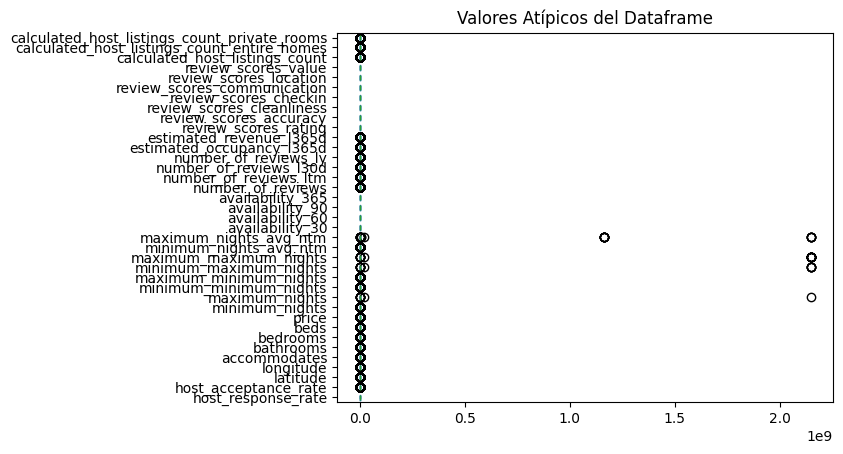

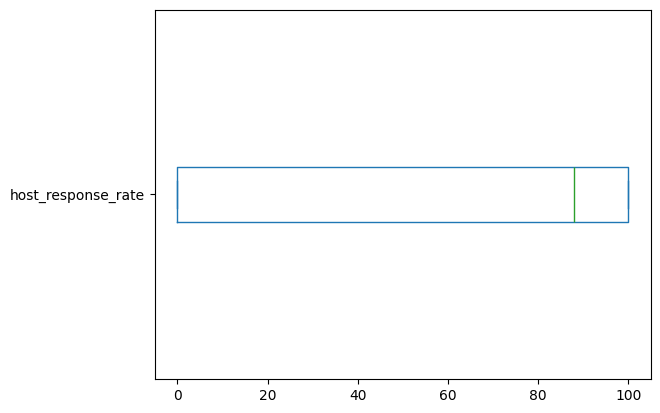

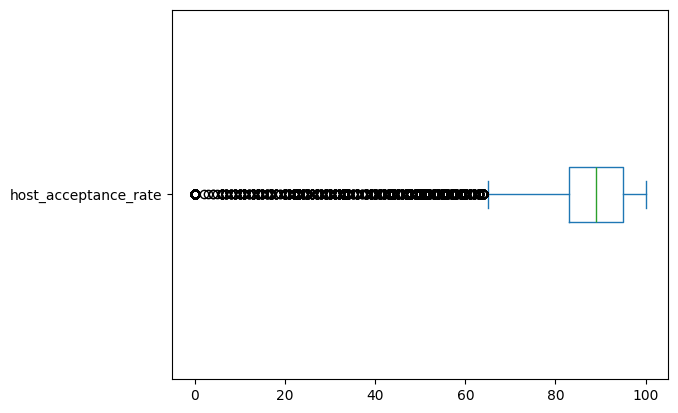

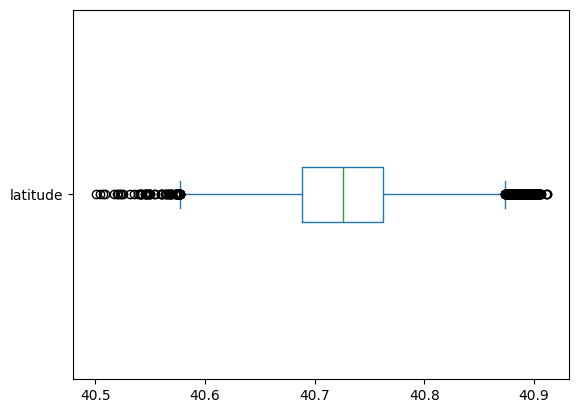

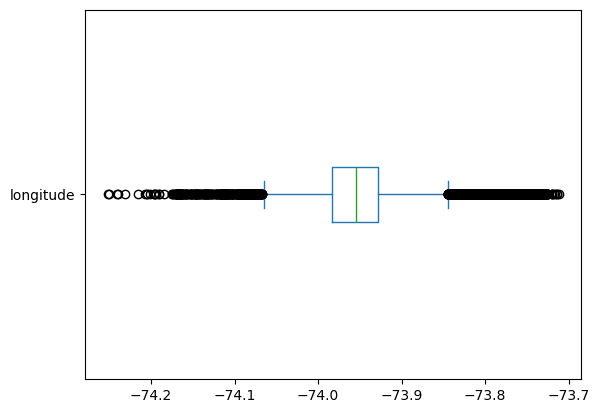

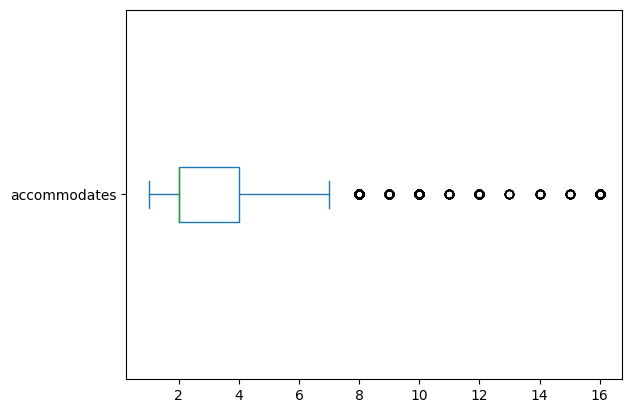

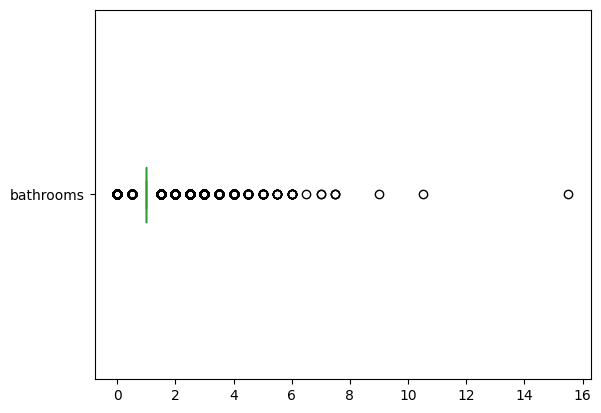

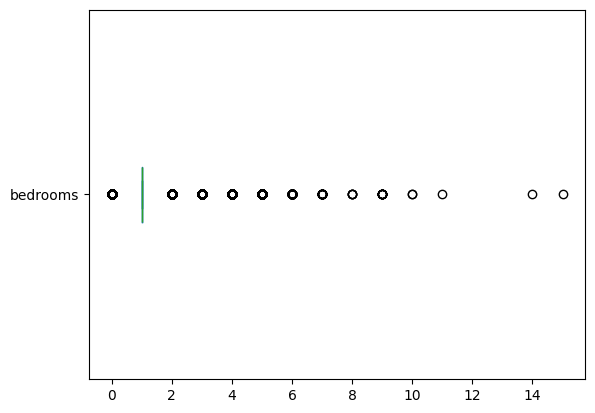

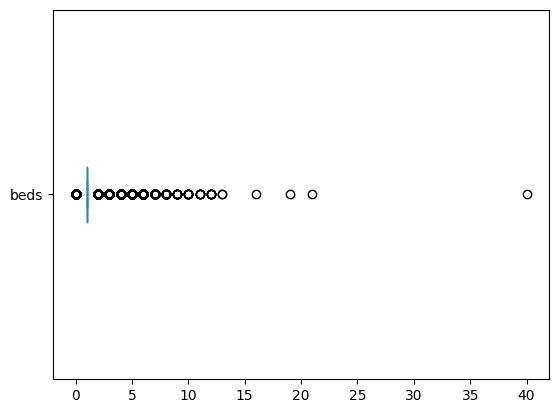

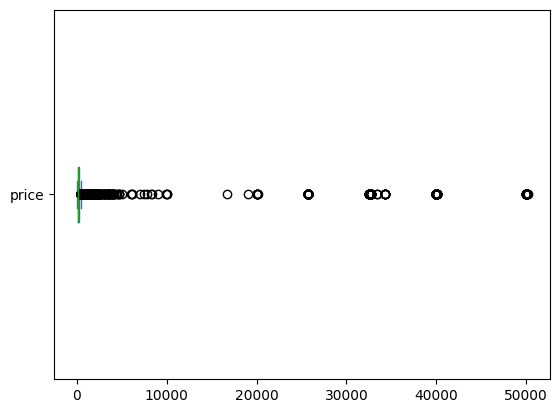

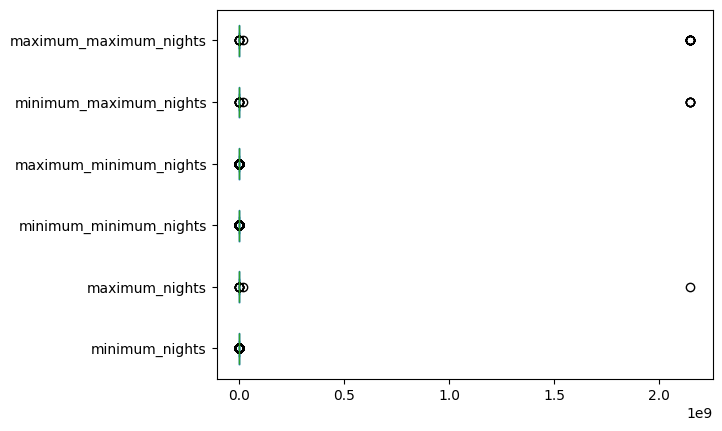

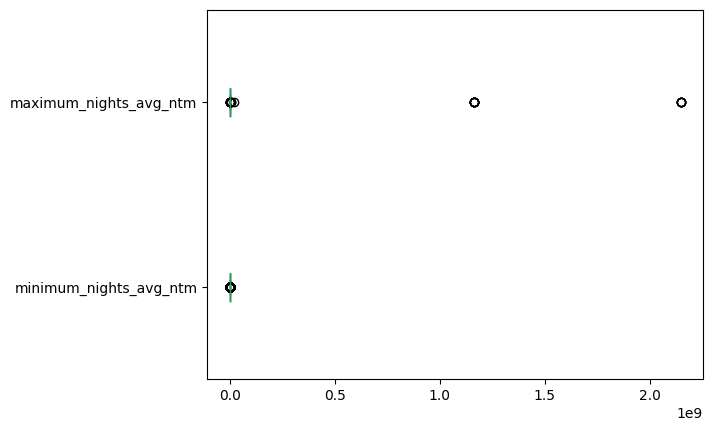

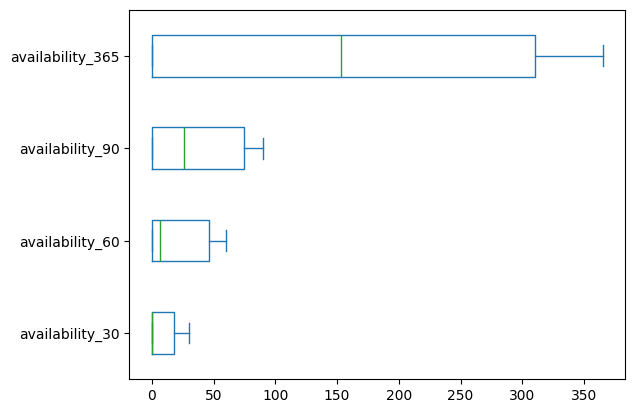

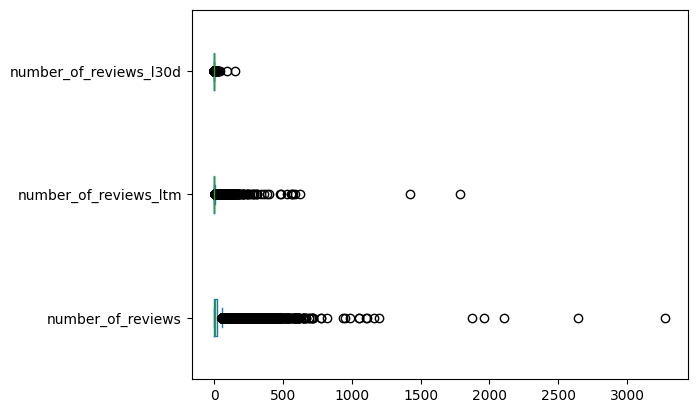

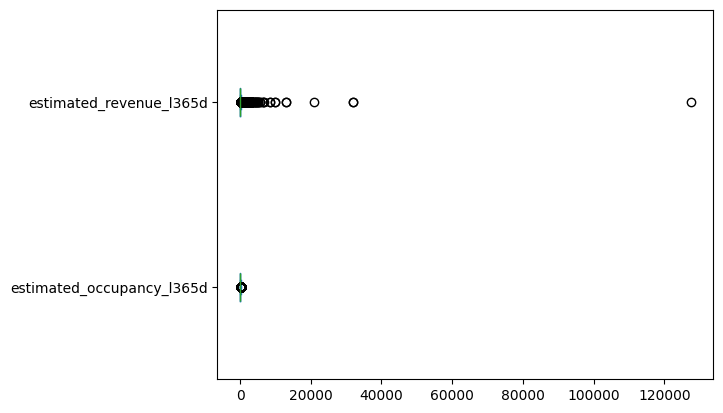

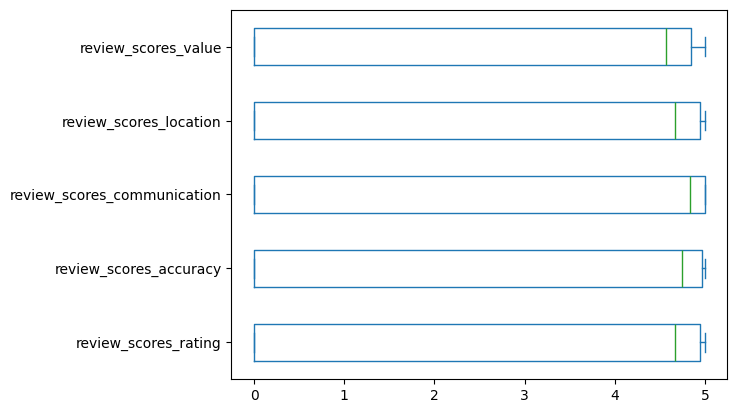

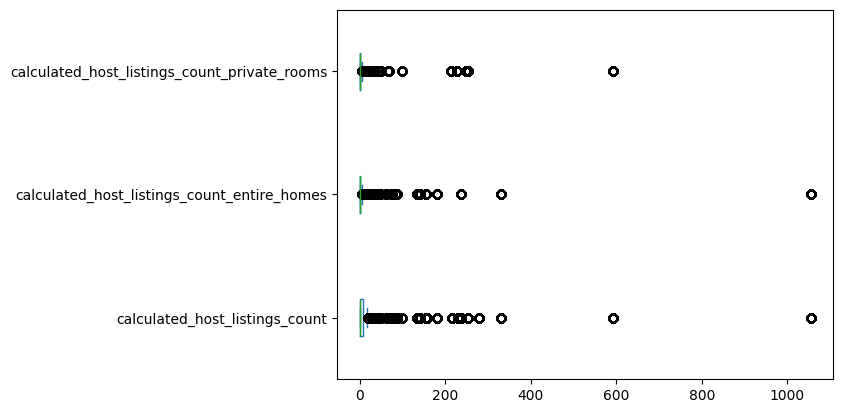

In [20]:
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=False)

plt.title("Valores Atípicos del Dataframe")
plt.show() 

cuantitativas['host_response_rate'].plot(kind='box', vert=False)
plt.show() 

cuantitativas['host_acceptance_rate'].plot(kind='box', vert=False)
plt.show() 

cuantitativas['latitude'].plot(kind='box', vert=False)
plt.show() 

cuantitativas['longitude'].plot(kind='box', vert=False)
plt.show() 

cuantitativas['accommodates'].plot(kind='box', vert=False)
plt.show() 

cuantitativas['bathrooms'].plot(kind='box', vert=False)
plt.show() 

cuantitativas['bedrooms'].plot(kind='box', vert=False)
plt.show() 

cuantitativas['beds'].plot(kind='box', vert=False)
plt.show() 

cuantitativas['price'].plot(kind='box', vert=False)
plt.show() 

cuantitativas[['minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights']].plot(kind='box', vert=False)
plt.show() 

cuantitativas[['minimum_nights_avg_ntm', 'maximum_nights_avg_ntm']].plot(kind='box', vert=False)
plt.show() 

cuantitativas[['availability_30', 'availability_60', 'availability_90', 'availability_365']].plot(kind='box', vert=False)
plt.show() 

cuantitativas[['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d']].plot(kind='box', vert=False)
plt.show() 

cuantitativas[['estimated_occupancy_l365d', 'estimated_revenue_l365d']].plot(kind='box', vert=False)
plt.show() 

cuantitativas[['review_scores_rating', 'review_scores_accuracy', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].plot(kind='box', vert=False)
plt.show() 

cuantitativas[['calculated_host_listings_count',  'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms']].plot(kind='box', vert=False)
plt.show() 

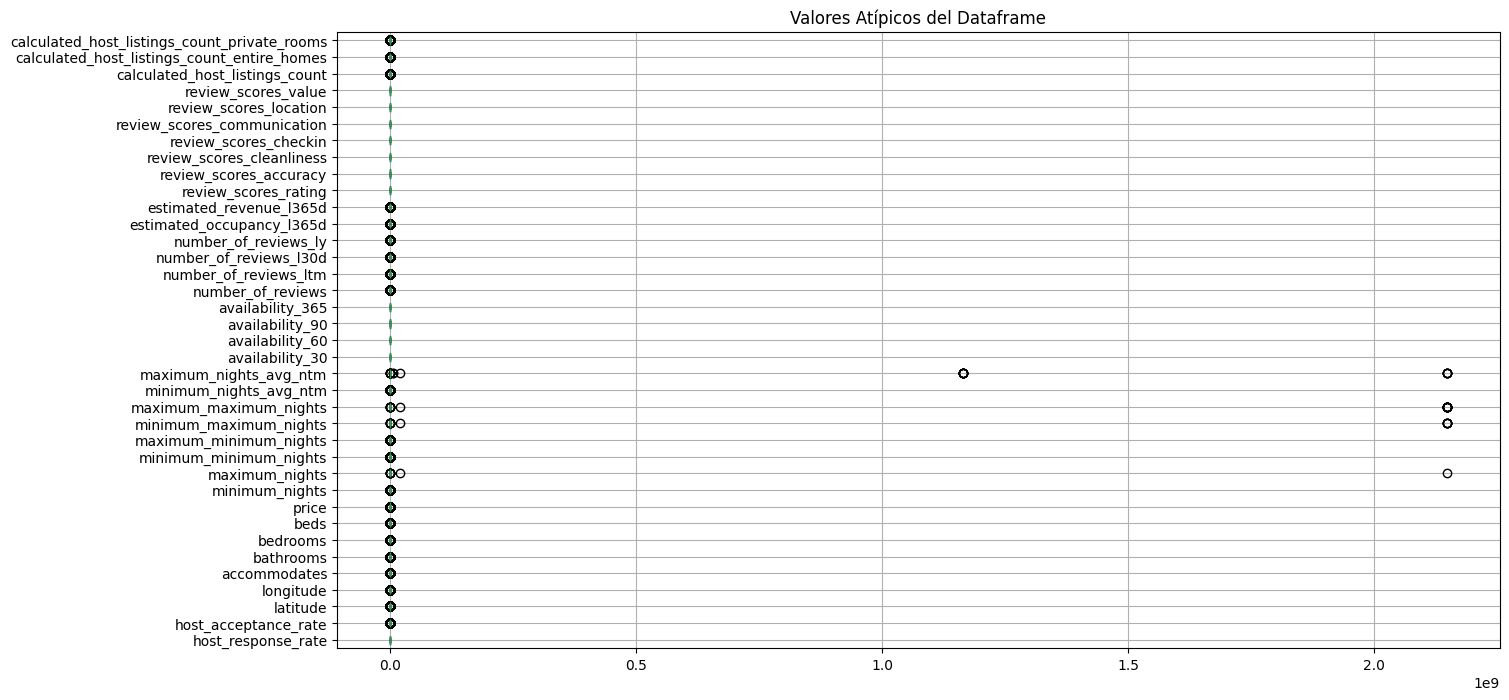

In [21]:
fig = plt.figure(figsize =(15, 8))
cuantitativas.boxplot(vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() 

Procedimiento de cuantiles

<Figure size 1500x800 with 0 Axes>

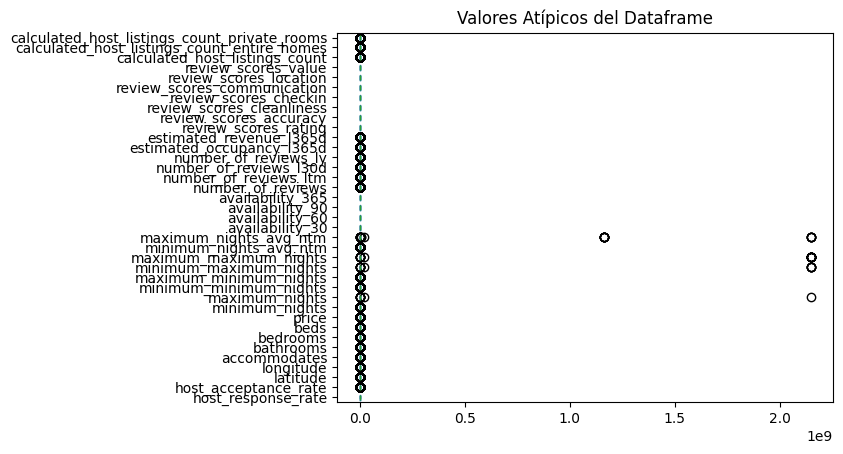

In [24]:
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=False)
#cuantitativas['subtotal_ventas_alimentos_bebidas'].plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [25]:
#Dividir cuartiles
y=cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [15]:
print(Limite_Superior_iqr)

host_response_rate                               250.000000
host_acceptance_rate                             113.000000
latitude                                          40.873451
longitude                                        -73.844741
accommodates                                       7.000000
bathrooms                                          1.000000
bedrooms                                           1.000000
beds                                               1.000000
price                                            475.339137
minimum_nights                                    30.000000
maximum_nights                                  2632.500000
minimum_minimum_nights                            30.000000
maximum_minimum_nights                            30.000000
minimum_maximum_nights                          2272.500000
maximum_maximum_nights                          2265.000000
minimum_nights_avg_ntm                            30.000000
maximum_nights_avg_ntm                  

In [8]:
#Obtenemos datos limpios del Dataframe
data3_iqr= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,100.0,80.0,40.645290,-73.972380,2.0,1.0,1.0,1.0,285.000000,30.0,...,4.89,4.88,5.00,5.00,5.0,4.75,4.88,6.0,1.0,5.0
1,94.0,NaN,40.753560,-73.985590,1.0,1.0,NaN,1.0,240.000000,30.0,...,4.68,4.73,4.63,4.77,4.8,4.81,4.40,3.0,3.0,0.0
2,0.0,100.0,40.662650,-73.994540,4.0,NaN,NaN,NaN,215.000000,30.0,...,4.75,4.75,4.50,5.00,5.0,4.75,4.75,1.0,1.0,0.0
3,100.0,100.0,40.709350,-73.953420,3.0,1.0,NaN,1.0,97.000000,30.0,...,4.59,4.60,4.85,4.85,4.8,4.69,4.58,1.0,1.0,0.0
4,91.0,NaN,40.801070,-73.942550,1.0,1.0,1.0,1.0,173.670007,30.0,...,5.00,5.00,5.00,5.00,5.0,5.00,5.00,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36317,100.0,80.0,40.711940,-73.989590,2.0,1.0,1.0,1.0,155.000000,30.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4.0,4.0,0.0
36318,0.0,89.0,40.697511,-73.977278,2.0,1.0,1.0,1.0,211.000000,30.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.0,1.0,0.0
36319,89.0,NaN,40.673820,-73.957115,1.0,1.0,1.0,1.0,65.000000,30.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2.0,0.0,2.0
36320,100.0,100.0,40.747123,-73.985808,4.0,NaN,NaN,NaN,NaN,30.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2.0,2.0,0.0


In [9]:
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

host_response_rate                                  0
host_acceptance_rate                             5985
latitude                                          390
longitude                                        2577
accommodates                                     1079
bathrooms                                        6985
bedrooms                                        10823
beds                                             8813
price                                            2765
minimum_nights                                   7380
maximum_nights                                      9
minimum_minimum_nights                           6475
maximum_minimum_nights                           7763
minimum_maximum_nights                             13
maximum_maximum_nights                             23
minimum_nights_avg_ntm                           7815
maximum_nights_avg_ntm                             23
availability_30                                     0
availability_60             

In [10]:
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.median(),1))
data4_iqr

,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,100.0,80.0,40.645290,-73.972380,2.0,1.0,1.0,1.0,285.000000,30.0,...,4.89,4.88,5.00,5.00,5.0,4.75,4.88,6.0,1.0,5.0
1,94.0,89.0,40.753560,-73.985590,1.0,1.0,1.0,1.0,240.000000,30.0,...,4.68,4.73,4.63,4.77,4.8,4.81,4.40,3.0,3.0,0.0
2,0.0,100.0,40.662650,-73.994540,4.0,1.0,1.0,1.0,215.000000,30.0,...,4.75,4.75,4.50,5.00,5.0,4.75,4.75,1.0,1.0,0.0
3,100.0,100.0,40.709350,-73.953420,3.0,1.0,1.0,1.0,97.000000,30.0,...,4.59,4.60,4.85,4.85,4.8,4.69,4.58,1.0,1.0,0.0
4,91.0,89.0,40.801070,-73.942550,1.0,1.0,1.0,1.0,173.670007,30.0,...,5.00,5.00,5.00,5.00,5.0,5.00,5.00,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36317,100.0,80.0,40.711940,-73.989590,2.0,1.0,1.0,1.0,155.000000,30.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4.0,4.0,0.0
36318,0.0,89.0,40.697511,-73.977278,2.0,1.0,1.0,1.0,211.000000,30.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.0,1.0,0.0
36319,89.0,89.0,40.673820,-73.957115,1.0,1.0,1.0,1.0,65.000000,30.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2.0,0.0,2.0
36320,100.0,100.0,40.747123,-73.985808,4.0,1.0,1.0,1.0,173.700000,30.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2.0,2.0,0.0


In [11]:
Datos_limpios = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios

,host_response_time,host_response_rate,host_is_superhost,host_location,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,reviews_per_month,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,within a few hours,100.0,f,"New York, NY",t,t,Kensington,Private room in condo,Private room,0.08,...,4.89,4.88,5.00,5.00,5.0,4.75,4.88,6.0,1.0,5.0
1,within a few hours,94.0,f,"Woodstock, NY",t,t,Midtown,Entire rental unit,Entire home/apt,0.26,...,4.68,4.73,4.63,4.77,4.8,4.81,4.40,3.0,3.0,0.0
2,Unknown,0.0,f,"New York, NY",t,t,Sunset Park,Entire townhouse,Entire home/apt,0.03,...,4.75,4.75,4.50,5.00,5.0,4.75,4.75,1.0,1.0,0.0
3,within an hour,100.0,t,"New York, NY",t,t,Williamsburg,Entire rental unit,Entire home/apt,1.00,...,4.59,4.60,4.85,4.85,4.8,4.69,4.58,1.0,1.0,0.0
4,within a day,91.0,f,"New York, NY",t,f,East Harlem,Private room in condo,Private room,0.03,...,5.00,5.00,5.00,5.00,5.0,5.00,5.00,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36317,within an hour,100.0,f,Unknown,f,t,Lower East Side,Entire rental unit,Entire home/apt,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4.0,4.0,0.0
36318,Unknown,0.0,f,"New York, United States",t,t,Fort Greene,Entire rental unit,Entire home/apt,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.0,1.0,0.0
36319,within an hour,89.0,f,"New York, NY",t,t,Crown Heights,Private room in rental unit,Private room,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2.0,0.0,2.0
36320,within an hour,100.0,f,Unknown,t,t,Midtown,Entire rental unit,Entire home/apt,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2.0,2.0,0.0


In [12]:
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

host_response_time                              0
host_response_rate                              0
host_is_superhost                               0
host_location                                   0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
property_type                                   0
room_type                                       0
reviews_per_month                               0
amenities                                       0
has_availability                                0
instant_bookable                                0
host_response_rate                              0
host_acceptance_rate                            0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0


In [13]:
Datos_limpios.to_csv('NewYorksinatipicos.csv')

PermissionError: [Errno 13] Permission denied: 'NewYorksinatipicos.csv'